In [1]:
# code to polynomial interpolation using divided difference

import numpy as np

# x and y values
def divided_diff(x, y):
    n = len(x)
    F_matrix = np.zeros((n, n))
    F_matrix = np.diag(y)
    for j in range(0,n):
        i=j-1
        while i>=0:
            F_matrix[i,j]=(F_matrix[i,j-1]-F_matrix[i+1,j])/(x[i]-x[j]) #F_matrix[i,j] is the divided difference f[xi...xj]
            i=i-1
    return F_matrix

In [2]:
def eval_poly(x, x_values, F_matrix):
    prods = []
    prod = 1
    for i in range(0, len(x_values)):
        prod = prod * (x - x_values[i])
        prods.append(prod)
    
    n = len(x_values)
    p = F_matrix[0, 0]
    for i in range(1, n):
        p = p + F_matrix[0, i] * prods[i-1]
    return p

In [3]:
# lets try on y=x^2

x = [0, 1, -1]
y = [1, 0, 4]

# F[i,j] = f[xi, xi+1, ... , xj]
F_matrix = np.zeros((len(x), len(x)))

F_matrix = divided_diff(x, y)


y_ = eval_poly(2, [0, 1, -1], F_matrix)

In [4]:
x = [i/8  for i in range(0, 5)]
y = [np.cos(np.pi * x_) for x_ in x]

F_matrix = divided_diff(x, y)

y_ = eval_poly(0.3, x, F_matrix)
print("interpolated cos(pix) @ x=0.3 is " , y_)

interpolated cos(pix) @ x=0.3 is  0.5878567543147465


In [5]:
for n in [2,4,40]:
    x = [2.0*i/n - 1 for i in range(0, n+1)]
    y = [2/(1+9*(x_**2)) for x_ in x]
    F_matrix = divided_diff(x, y)
    y_ = eval_poly(0.07, x, F_matrix)
    y_true = 2/(1+9*(0.07**2))
    print(f"num points: {n}, est. f(x): {y_:.10f}, true f(x): {y_true:.10f}, error: {abs(y_ - y_true):.10f}")

num points: 2, est. f(x): 1.9911800000, true f(x): 1.9155253328, error: 0.0756546672
num points: 4, est. f(x): 1.9668750652, true f(x): 1.9155253328, error: 0.0513497324
num points: 40, est. f(x): 1.9155253271, true f(x): 1.9155253328, error: 0.0000000057


In [8]:
for n in [2,4,6, 8, 10, 12, 14, 16, 18, 20, 40]:
    x = [2.0*i/n - 1 for i in range(0, n+1)]
    y = [2/(1+9*(x_**2)) for x_ in x]
    F_matrix = divided_diff(x, y)

    x_test = [2.0*i/(1000) - 1 for i in range(0, 1000+1)]
    y_test = [eval_poly(x_, x, F_matrix) for x_ in x_test]
    y_true = [2/(1+9*(x_**2)) for x_ in x_test]
    error = np.max(np.abs(np.array(y_test) - np.array(y_true)))
    print(f"num points: {n}"," and the error is :", error)

num points: 2  and the error is : 0.935088815843589
num points: 4  and the error is : 0.5963133727810657
num points: 6  and the error is : 0.6302359263450761
num points: 8  and the error is : 0.7681245303002646
num points: 10  and the error is : 0.9995971865664197
num points: 12  and the error is : 1.3512655147224266
num points: 14  and the error is : 1.873467094320752
num points: 16  and the error is : 2.644132287224602
num points: 18  and the error is : 3.7836653811075536
num points: 20  and the error is : 5.465170585146498
num points: 40  and the error is : 290.09560756889874


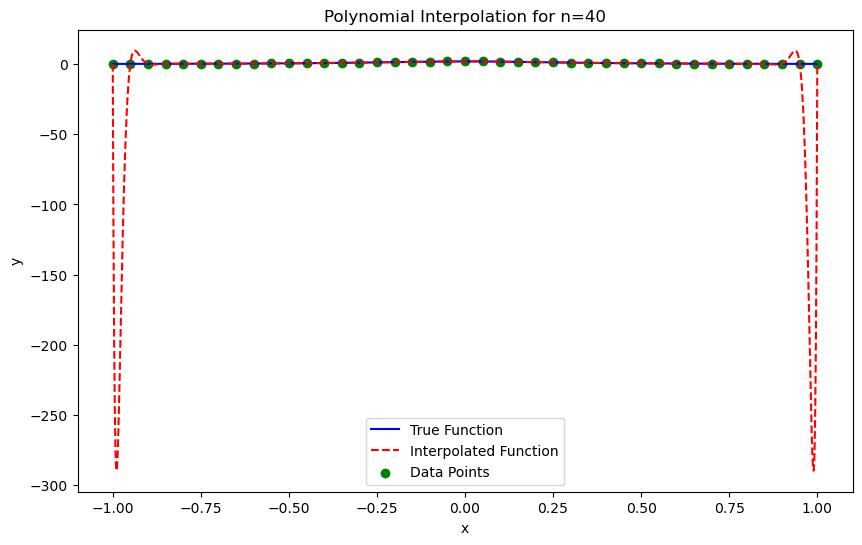

In [9]:
import matplotlib.pyplot as plt

# Plot for n=40
n = 40
x = [2.0*i/n - 1 for i in range(0, n+1)]
y = [2/(1+9*(x_**2)) for x_ in x]
F_matrix = divided_diff(x, y)

x_test = [2.0*i/(1000) - 1 for i in range(0, 1000+1)]
y_test = [eval_poly(x_, x, F_matrix) for x_ in x_test]
y_true = [2/(1+9*(x_**2)) for x_ in x_test]

plt.figure(figsize=(10, 6))
plt.plot(x_test, y_true, label='True Function', color='blue')
plt.plot(x_test, y_test, label='Interpolated Function', linestyle='--', color='red')
plt.scatter(x, y, color='green', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Interpolation for n=40')
plt.legend()
plt.show()